In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6167 non-null   float64
dtypes: float64(1)
memory usage: 98.3 KB
None


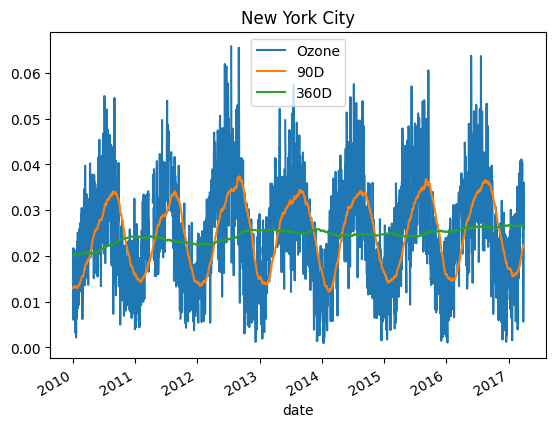

In [2]:
# Import and inspect ozone data here
data = pd.read_csv('./ozone_nyc.csv', parse_dates=['date'], index_col='date')
print(data.info())

# Calculate 90d and 360d rolling mean for the last price
data['90D'] = data.Ozone.rolling('90D').mean()
data['360D'] = data.Ozone.rolling('360D').mean()

# Plot data
data['2010':].plot(title='New York City')
plt.show()

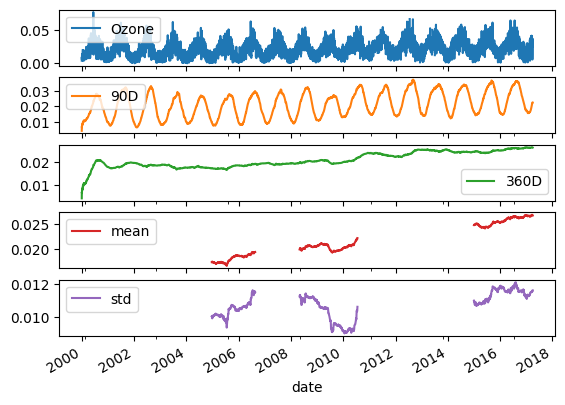

In [3]:
# Import and inspect ozone data here
# data = pd.read_csv('ozone.csv', parse_dates=['date'], index_col='date').dropna()

# Calculate the rolling mean and std here
rolling_stats = data.Ozone.rolling(360).agg(['mean', 'std'])

# Join rolling_stats with ozone data
stats = data.join(rolling_stats)

# Plot stats
stats.plot(subplots=True);
plt.show()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6300 entries, 2000-01-01 to 2017-03-31
Freq: D
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6300 non-null   float64
 1   90D     6300 non-null   float64
 2   360D    6300 non-null   float64
dtypes: float64(3)
memory usage: 196.9 KB


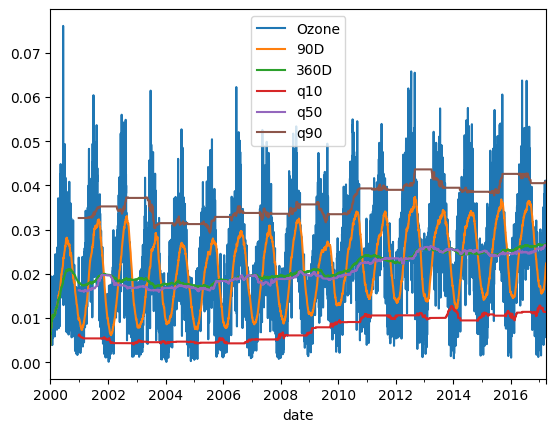

In [4]:
# Resample, interpolate and inspect ozone data here
data = data.resample('D').interpolate()
data.info()

# Create the rolling window
rolling = data['Ozone'].rolling(360)

# Insert the rolling quantiles to the monthly returns
data['q10'] = rolling.quantile(0.1)
data['q50'] = rolling.quantile(0.5)
data['q90'] = rolling.quantile(0.9)
# Plot the data
data.plot()
plt.show()

In [27]:
data = pd.read_csv('./google.csv', parse_dates=['Date'], index_col='Date')
data.dropna(inplace=True)
data.shape

(756, 1)

In [29]:
# Calculate differences
differences = data.diff().dropna()

# Select start price
start_price = data.head(1)

# Calculate cumulative sum
cumulative_sum = pd.concat([start_price, differences]).cumsum()

# Validate cumulative sum equals data
print(data.equals(cumulative_sum))
cumulative_sum, data

True


(             Close
 Date              
 2014-01-02  556.00
 2014-01-03  551.95
 2014-01-06  558.10
 2014-01-07  568.86
 2014-01-08  570.04
 ...            ...
 2016-12-23  789.91
 2016-12-27  791.55
 2016-12-28  785.05
 2016-12-29  782.79
 2016-12-30  771.82
 
 [756 rows x 1 columns],
              Close
 Date              
 2014-01-02  556.00
 2014-01-03  551.95
 2014-01-06  558.10
 2014-01-07  568.86
 2014-01-08  570.04
 ...            ...
 2016-12-23  789.91
 2016-12-27  791.55
 2016-12-28  785.05
 2016-12-29  782.79
 2016-12-30  771.82
 
 [756 rows x 1 columns])

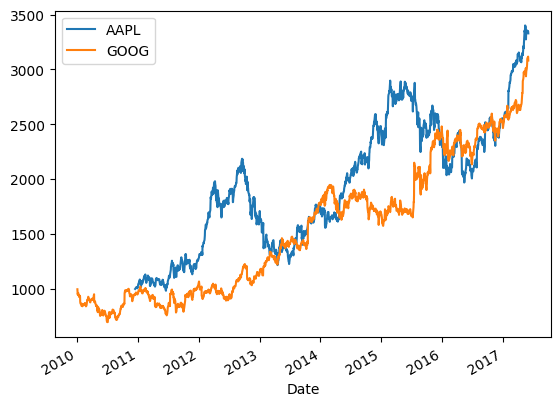

In [31]:
# Define your investment
investment = 1000
data = pd.read_csv('./apple_google.csv', parse_dates=['Date'], index_col='Date')
# Calculate the daily returns here
returns = data.pct_change()

# Calculate the cumulative returns here
returns_plus_one = returns.add(1)
cumulative_return = returns_plus_one.cumprod()

# Calculate and plot the investment return here 
cumulative_return.mul(investment).plot()
plt.show();

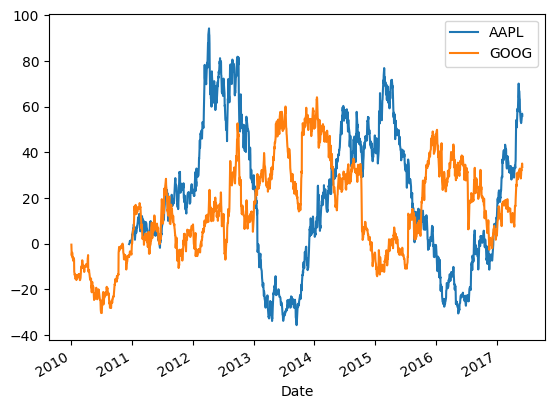

In [32]:
# Import numpy
import numpy as np

# Define a multi_period_return function
def multi_period_return(period_returns):
    return np.prod(period_returns + 1) - 1
    
# Calculate daily returns
daily_returns = data.pct_change()

# Calculate rolling_annual_returns
rolling_annual_returns = daily_returns.rolling('360D').apply(multi_period_return)

# Plot rolling_annual_returns
rolling_annual_returns.mul(100).plot();
plt.show()

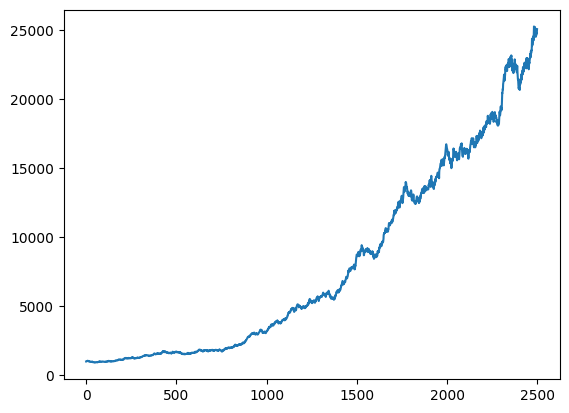

In [34]:
from numpy.random import normal, seed
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set seed here
seed(42)

# Create random_walk
random_walk = normal(loc=.001, scale=.01, size=2500)

# Convert random_walk to pd.series
random_walk = pd.Series(random_walk)

# Create random_prices
random_prices = random_walk.add(1).cumprod()

# Plot random_prices here
random_prices.mul(1000).plot()
plt.show()

In [68]:
type(daily_returns.Close)

pandas.core.series.Series

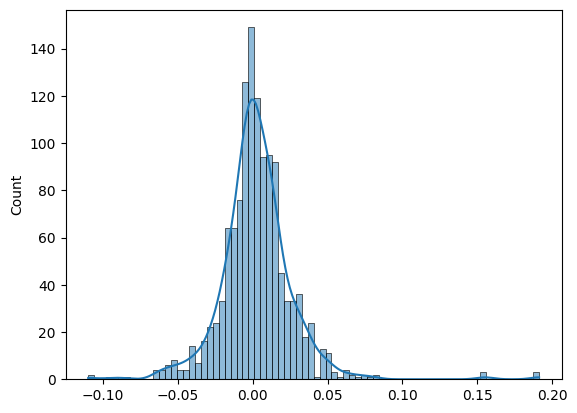

0    0.016946
1   -0.014928
2   -0.033104
3   -0.005080
4    0.004367
dtype: float64

In [93]:
# Set seed here
seed(42)
fb = pd.read_csv('./fb.csv', parse_dates=['Date'], index_col='Date')
# Calculate daily_returns here
daily_returns = fb.pct_change().dropna()

# Get n_obs
n_obs = daily_returns.count().values[0]


from numpy.random import choice
# Create random_walk
random_walk = choice(daily_returns.Close, n_obs)

# Convert random_walk to pd.series
random_walk = pd.Series(random_walk)

import seaborn as sns
# Plot random_walk distribution
sns.histplot(random_walk,kde=True)
plt.show();
# n_obs
random_walk.head()

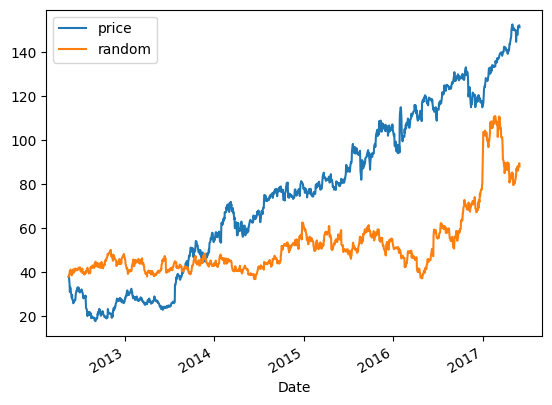

,price,random
Date,,
2012-05-17,38.00,38.000000
2012-05-18,38.23,38.203866
2012-05-21,34.03,39.674653
2012-05-22,31.00,40.513350
2012-05-23,32.00,39.764877


In [118]:
# Select fb start price here
fb = pd.read_csv('./fb.csv', parse_dates=['Date'], index_col='Date')
fb.rename(columns={ 'Close' : 'price'}, inplace=True)
daily_returns = fb.pct_change().dropna()
start = fb.price.head(1)
random_walk = choice(daily_returns.price, fb.shape[0] - 1)

# # Convert random_walk to pd.series
random_walk = pd.Series(random_walk)
# Add 1 to random walk and append to start
random_walk = random_walk.add(1)
# random_price = start.append(random_walk)
random_price = pd.concat([start, random_walk]).reset_index(drop=True)

# Calculate cumulative product here
random_price = random_price.cumprod()

# Insert into fb and plot
fb = fb.reset_index()
fb['random'] = random_price
fb = fb.set_index('Date')
fb.plot()
plt.show()
fb.head()
# random_price

In [123]:
data = pd.read_csv('./5_stocks.csv', parse_dates=['Date'], index_col='Date')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4001 entries, 2001-07-05 to 2017-05-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    4000 non-null   float64
 1   AMZN    4000 non-null   float64
 2   IBM     4000 non-null   float64
 3   WMT     4000 non-null   float64
 4   XOM     4000 non-null   float64
dtypes: float64(5)
memory usage: 187.5 KB
None
          AAPL      AMZN       IBM       WMT       XOM
AAPL  1.000000  0.208731  0.460568 -0.183553  0.336413
AMZN  0.208731  1.000000  0.346407 -0.367620 -0.133965
IBM   0.460568  0.346407  1.000000  0.155445  0.367253
WMT  -0.183553 -0.367620  0.155445  1.000000  0.178833
XOM   0.336413 -0.133965  0.367253  0.178833  1.000000


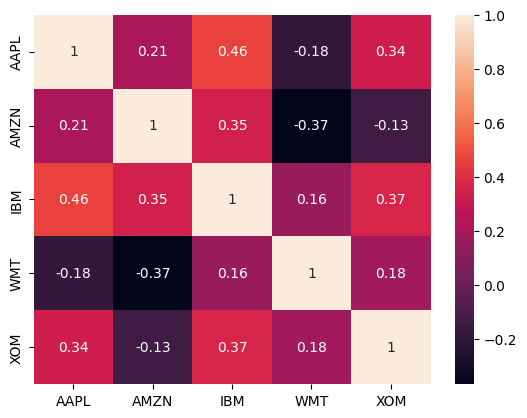

In [124]:
# Inspect data here
print(data.info())

# Calculate year-end prices here
annual_prices = data.resample('A').last()

# Calculate annual returns here
annual_returns = annual_prices.pct_change()

# Calculate and print the correlation matrix here
correlations = annual_returns.corr()
print(correlations)

# Visualize the correlations as heatmap here
sns.heatmap(correlations, annot=True)
plt.show()